In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import dill as pickle
import seaborn as sns
import random
import math
import scipy.stats as stats

In [2]:
grid_res = 200
title = 'LV'
x_grid = np.linspace(0, 1, grid_res +1)
t_grid = np.linspace(0, 1, grid_res +1)

params = [x_grid, t_grid]

x = torch.from_numpy(x_grid)
t = torch.from_numpy(t_grid)

grid = torch.cartesian_prod(x, t).float()

In [4]:
#PATH TO SIMPLE ENSEMBLE TENSOR
#u_sde = torch.load('C:\\Users\\...\\lv_35_family_solutions_shape_torch.Size([35, 201, 2]).pt.', weights_only=True)

In [5]:
u_sde_mean_tens = u_sde.detach().cpu().numpy()

In [6]:
#PATH TO BN ENSEMBLE TENSOR
#u_main = torch.load('C:\\Users\\...\\file_u_main_[35, 201, 2]_autograd_[0].pt', weights_only=False)

In [7]:
#PATH TO INITIAL DATA
#initial_data = np.load('C:\\Users\\...\\lotka-volterra\\data_synth.npy')

In [8]:
def calculate_statistics(u_main):

    mean_arr = np.zeros((u_main.shape[1], u_main.shape[2]))
    var_arr = np.zeros((u_main.shape[1], u_main.shape[2]))
    s_g_arr = np.zeros((u_main.shape[1], u_main.shape[2]))
    s_arr = np.zeros((u_main.shape[1], u_main.shape[2])) 
    
    for i in range(u_main.shape[1]):
        for j in range(u_main.shape[2]):
            mean_arr[i, j] = np.mean(u_main[:, i, j])
            var_arr[i, j] = np.var(u_main[:, i, j])
            m = np.mean(u_main[:, i, j])
            s_arr[i, j] = math.sqrt(np.sum(list(map(lambda x: (x - m)**2, u_main[:, i, j])))/(len(u_main[:, i, j]) - 1))
    
    mean_tens = torch.from_numpy(mean_arr)
    var_tens = torch.from_numpy(var_arr)
    s_g_arr = torch.from_numpy(var_arr) ** (1/2)
    s_arr = torch.from_numpy(s_arr)
    
    # Confidence region for the mean
    upper_bound = mean_tens + 1.96 * s_arr / math.sqrt(len(u_main))
    lower_bound = mean_tens - 1.96 * s_arr / math.sqrt(len(u_main))
    
    mean_tens = mean_tens.reshape(-1)
    upper_bound = upper_bound.reshape(-1)
    lower_bound = lower_bound.reshape(-1)
    
    return mean_tens, upper_bound, lower_bound

In [9]:
u_bs_mean_tens, u_bs_upper_bound, u_bs_lower_bound = calculate_statistics(u_main)

In [10]:
u_temp = u_main - u_sde_mean_tens

print(u_temp.shape)

result_1 = np.mean(u_temp , axis=0)

print(result_1)

result_1.shape

(35, 201, 2)
[[ 5.78430176e-01 -6.22725487e-03]
 [ 6.41116991e-01 -2.05429355e-03]
 [ 6.74354552e-01  6.20755830e-03]
 [ 6.83597400e-01  2.38339800e-02]
 [ 6.71441468e-01  5.07224730e-02]
 [ 6.36813239e-01  8.59612526e-02]
 [ 5.78997883e-01  1.30246206e-01]
 [ 4.95637871e-01  1.82669218e-01]
 [ 3.84215226e-01  2.42501079e-01]
 [ 2.42734798e-01  3.10601984e-01]
 [ 6.89718165e-02  3.85318205e-01]
 [-1.39450012e-01  4.66810670e-01]
 [-3.82014690e-01  5.52737265e-01]
 [-6.58949933e-01  6.40553843e-01]
 [-9.74317246e-01  7.30534505e-01]
 [-1.32838447e+00  8.20560553e-01]
 [-1.71708854e+00  9.06222157e-01]
 [-2.14174255e+00  9.86512587e-01]
 [-2.59409723e+00  1.05472071e+00]
 [-3.07510336e+00  1.10857800e+00]
 [-3.57532506e+00  1.14332237e+00]
 [-4.08589478e+00  1.15269677e+00]
 [-4.59859297e+00  1.13164314e+00]
 [-5.10311530e+00  1.07209241e+00]
 [-5.58271084e+00  9.66707374e-01]
 [-6.01369488e+00  8.07422012e-01]
 [-6.37878992e+00  5.85201419e-01]
 [-6.65452375e+00  2.91640079e-01]
 [-6.81

(201, 2)

$$
M[BS]−M[SDE]
$$

In [11]:
u_main_bs = np.mean(u_main, axis=0)
result_2 = u_main_bs - u_sde_mean_tens
print(result_2)
result_2.shape

[[[ 5.78430176e-01 -6.22725487e-03]
  [ 6.37017014e-01 -4.19099680e-03]
  [ 6.65953046e-01  2.01410770e-03]
  ...
  [ 7.92477728e+00  8.82765724e-01]
  [ 8.07749955e+00  1.08448000e+00]
  [ 8.19855630e+00  1.29275735e+00]]

 [[ 5.78430176e-01 -6.22725487e-03]
  [ 6.45445493e-01  4.06249332e-03]
  [ 6.82704663e-01  1.86223189e-02]
  ...
  [ 9.05814952e+00  1.23314901e+00]
  [ 9.24586961e+00  1.44572467e+00]
  [ 9.40250960e+00  1.66532944e+00]]

 [[ 5.78430176e-01 -6.22725487e-03]
  [ 6.41616546e-01  3.74532915e-03]
  [ 6.74692486e-01  1.77556303e-02]
  ...
  [ 7.83397552e+00  1.27776304e+00]
  [ 7.96377229e+00  1.47609578e+00]
  [ 8.06021184e+00  1.68173797e+00]]

 ...

 [[ 5.78430176e-01 -6.22725487e-03]
  [ 6.41214377e-01 -3.28718019e-03]
  [ 6.74555734e-01  3.64209434e-03]
  ...
  [ 6.48038650e+00  9.02354228e-01]
  [ 6.57453484e+00  1.08858463e+00]
  [ 6.63498017e+00  1.28131286e+00]]

 [[ 5.78430176e-01 -6.22725487e-03]
  [ 6.46838835e-01 -2.82858836e-03]
  [ 6.86253262e-01  4.8593

(35, 201, 2)

In [12]:
result_2 = u_main_bs - u_sde_mean_tens
print(result_1)

[[ 5.78430176e-01 -6.22725487e-03]
 [ 6.41116991e-01 -2.05429355e-03]
 [ 6.74354552e-01  6.20755830e-03]
 [ 6.83597400e-01  2.38339800e-02]
 [ 6.71441468e-01  5.07224730e-02]
 [ 6.36813239e-01  8.59612526e-02]
 [ 5.78997883e-01  1.30246206e-01]
 [ 4.95637871e-01  1.82669218e-01]
 [ 3.84215226e-01  2.42501079e-01]
 [ 2.42734798e-01  3.10601984e-01]
 [ 6.89718165e-02  3.85318205e-01]
 [-1.39450012e-01  4.66810670e-01]
 [-3.82014690e-01  5.52737265e-01]
 [-6.58949933e-01  6.40553843e-01]
 [-9.74317246e-01  7.30534505e-01]
 [-1.32838447e+00  8.20560553e-01]
 [-1.71708854e+00  9.06222157e-01]
 [-2.14174255e+00  9.86512587e-01]
 [-2.59409723e+00  1.05472071e+00]
 [-3.07510336e+00  1.10857800e+00]
 [-3.57532506e+00  1.14332237e+00]
 [-4.08589478e+00  1.15269677e+00]
 [-4.59859297e+00  1.13164314e+00]
 [-5.10311530e+00  1.07209241e+00]
 [-5.58271084e+00  9.66707374e-01]
 [-6.01369488e+00  8.07422012e-01]
 [-6.37878992e+00  5.85201419e-01]
 [-6.65452375e+00  2.91640079e-01]
 [-6.81557010e+00 -7

In [13]:
def process_data(data, confidence=0.95):
    hares = data[:, :, 0]
    lynxes = data[:, :, 1]
    
    def calculate_ci(arr):
        mean = np.mean(arr, axis=0)
        sem = stats.sem(arr, axis=0)
        h = sem * stats.t.ppf((1 + confidence)/2, len(arr)-1)
        return mean, mean - h, mean + h
    
    hares_mean, hares_lower, hares_upper = calculate_ci(hares)
    lynxes_mean, lynxes_lower, lynxes_upper = calculate_ci(lynxes)
    
    return {
        'hares': (hares_mean, hares_lower, hares_upper),
        'lynxes': (lynxes_mean, lynxes_lower, lynxes_upper)
    }

In [14]:
rmse_hares = np.sqrt(np.mean((u_main[..., 0] - u_sde_mean_tens[..., 0])**2))
print('RMSE hares:', rmse_hares)

rmse_lynxes = np.sqrt(np.mean((u_main[..., 1] - u_sde_mean_tens[..., 1])**2))
print('RMSE lynxes:', rmse_lynxes)

RMSE hares: 7.519724715792196
RMSE lynxes: 5.139498850799438


In [15]:
initial_data.shape

(2, 201)

In [16]:
result1 = process_data(u_sde_mean_tens)
result2 = process_data(u_main)
#initial_result = process_data(initial_data)

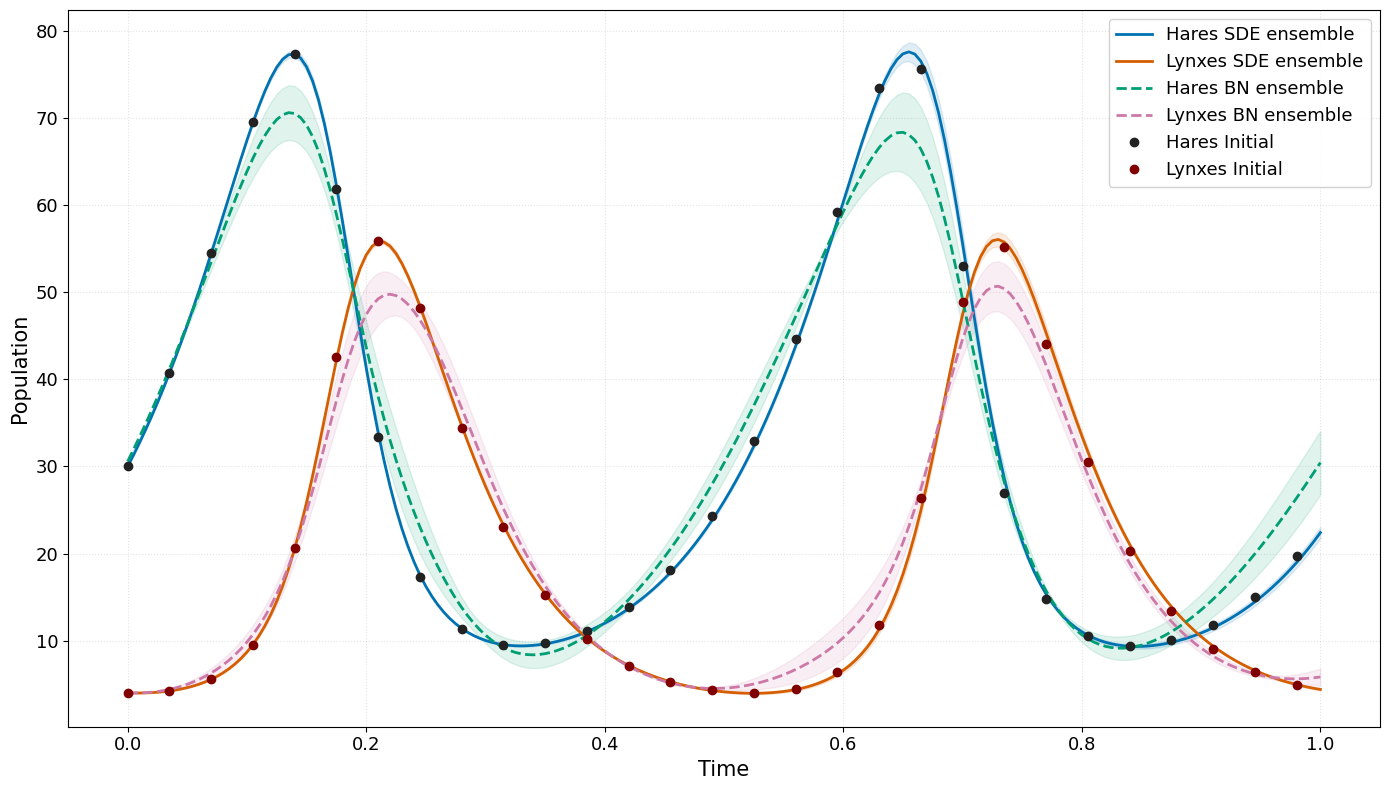

In [19]:
plt.figure(figsize=(14, 8))

colors = {
    'sde':     {'hares': '#0072B2', 'lynxes': '#D55E00'}, 
    'bn':      {'hares': '#009E73', 'lynxes': '#CC79A7'},  
    'initial': {'hares': '#222222', 'lynxes': '#800000'}   
}

offset = 0.0

def adjust_ci(mean, lower, upper):
    if np.all(lower == upper):
        return mean, mean-0.1, mean+0.1
    return mean, lower, upper

styles = ['-', '--']
lw_main = [2, 2]

for i, (result, style) in enumerate(zip([result1, result2], ['sde', 'bn'])):
    mean, lower, upper = adjust_ci(*result['hares'])
    plt.plot(
        t + i*offset, mean, styles[i], color=colors[style]['hares'],
        label=f'Hares {"SDE" if i == 0 else "BN"} ensemble', lw=lw_main[i], zorder=3)
    plt.fill_between(
        t + i*offset, lower, upper, 
        color=colors[style]['hares'], alpha=0.12, zorder=1)
    
    mean, lower, upper = adjust_ci(*result['lynxes'])
    plt.plot(
        t + i*offset, mean, styles[i], color=colors[style]['lynxes'],
        label=f'Lynxes {"SDE" if i == 0 else "BN"} ensemble', lw=lw_main[i], zorder=3)
    plt.fill_between(
        t + i*offset, lower, upper, 
        color=colors[style]['lynxes'], alpha=0.12, zorder=1)
plt.plot(t[::7], initial_data[0][::7], 'o', color=colors['initial']['hares'], markersize=6, zorder=11, label='Hares Initial')
plt.plot(t[::7], initial_data[1][::7], 'o', color=colors['initial']['lynxes'], markersize=6, zorder=11, label='Lynxes Initial')

plt.xlabel('Time', fontsize=15)
plt.ylabel('Population', fontsize=15)

plt.legend(loc='upper right', fontsize=13, frameon=True, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.35)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.show()